In [1]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('../data/housing/train.csv')
test_df = pd.read_csv('../data/housing/test.csv')

# Display basic info
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nTrain columns:")
print(train_df.columns.tolist())
print("\nFirst few rows:")
print(train_df.head())

Train shape: (1460, 81)
Test shape: (1459, 80)

Train columns:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'E

In [2]:
# Check duplicates
print("Duplicate rows in train:", train_df.duplicated().sum())
print("Duplicate rows in test:", test_df.duplicated().sum())

# Save Ids and drop
train_ids = train_df['Id']
test_ids = test_df['Id']
train_df.drop(columns=['Id'], inplace=True)
test_df.drop(columns=['Id'], inplace=True)

# Define columns to fill as "None" or 0
cols_none = [
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
]

cols_zero = [
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'
]

# Fill missing values
for col in cols_none:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna("None")
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna("None")

for col in cols_zero:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(0)
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(0)

# Fill LotFrontage
median_lf = train_df['LotFrontage'].median()
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(median_lf)
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(median_lf)

# Fill remaining missing
remaining_missing_train = train_df.columns[train_df.isnull().any()].tolist()
for col in remaining_missing_train:
    mode_val = train_df[col].mode()[0]
    train_df[col] = train_df[col].fillna(mode_val)
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(mode_val)

print("Missing values in train after cleaning:", train_df.isnull().sum().sum())
print("Missing values in test after cleaning:", test_df.isnull().sum().sum())

Duplicate rows in train: 0
Duplicate rows in test: 0
Missing values in train after cleaning: 0
Missing values in test after cleaning: 12


In [3]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,...,144,0,None,None,None,0,1,2010,WD,Normal


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

# Prepare target and features
y_train = train_df['SalePrice']
X_train = train_df.drop(columns=['SalePrice'])
X_test = test_df.copy()

# Feature Engineering
for df in [X_train, X_test]:
    df['TotalBath'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']

# Encode categorical variables
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Align columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='inner', axis=1)

print(f"Final feature shape: Train: {X_train_encoded.shape}, Test: {X_test_encoded.shape}")

# Train-validation split
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_encoded, np.log1p(y_train), test_size=0.2, random_state=42
)

Final feature shape: Train: (1460, 244), Test: (1459, 244)


In [13]:
pip install xgboost

  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.2-py3-none-win_amd64.whl (72.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

xgb_reg = xgb.XGBRegressor(
    random_state=42,
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6
)

xgb_reg.fit(X_train_split, y_train_split, 
            eval_set=[(X_val, y_val)], 
            verbose=False)

# Predict and convert back from log scale
y_pred_xgb = xgb_reg.predict(X_val)
y_pred_xgb_orig = np.expm1(y_pred_xgb)
y_val_orig = np.expm1(y_val)

# Calculate metrics
mae_xgb = mean_absolute_error(y_val_orig, y_pred_xgb_orig)
rmse_xgb = np.sqrt(mean_squared_error(y_val_orig, y_pred_xgb_orig))

print(f"MAE: ${mae_xgb:.0f}")
print(f"RMSE: ${rmse_xgb:.0f}")

MAE: $16658
RMSE: $26656


In [15]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_reg, '../models/xgboost_price_model.pkl')

# Also save the list of feature names
feature_names = X_train_encoded.columns.tolist()
joblib.dump(feature_names, '../models/model_features.pkl')

print("✅ Model and feature names saved successfully!")

✅ Model and feature names saved successfully!


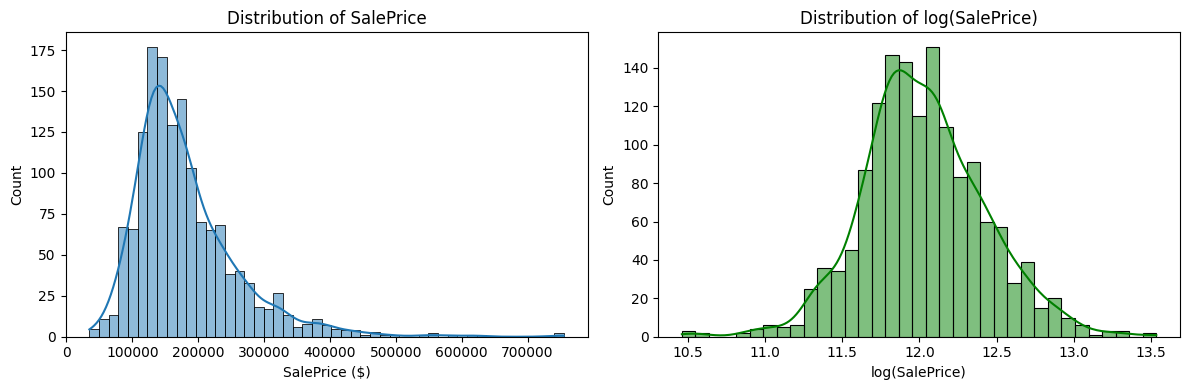

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of SalePrice
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice ($)')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(y_train), kde=True, color='green')
plt.title('Distribution of log(SalePrice)')
plt.xlabel('log(SalePrice)')
plt.tight_layout()
plt.show()

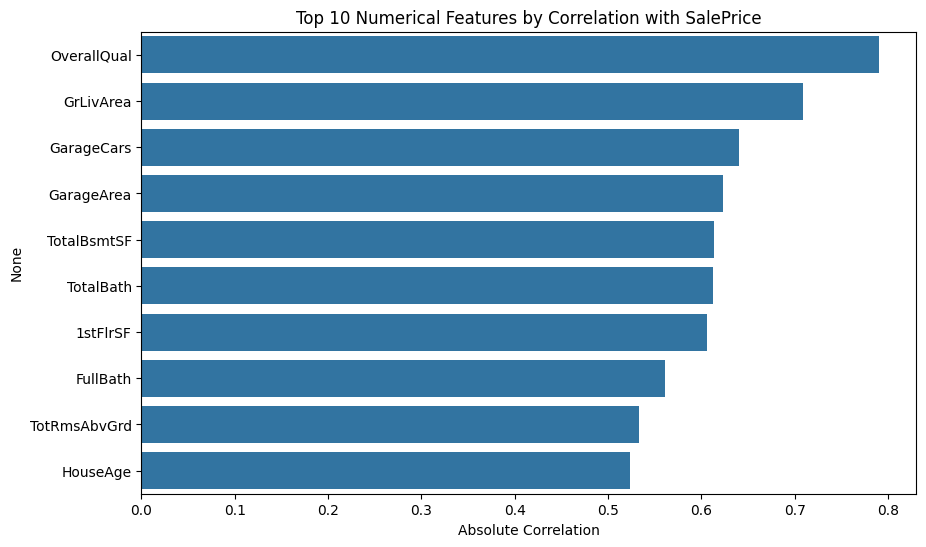

In [17]:
# Top 10 numerical features correlated with SalePrice
num_features = X_train.select_dtypes(exclude='object').columns.tolist()
corr_data = pd.concat([X_train[num_features], y_train], axis=1)
corr = corr_data.corr()['SalePrice'].abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr[1:11], y=corr.index[1:11])
plt.title('Top 10 Numerical Features by Correlation with SalePrice')
plt.xlabel('Absolute Correlation')
plt.show()

In [18]:
# Create comparison DataFrame with actual vs predicted
key_features = ['GrLivArea', 'OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea']
comparison_df = X_val[key_features].copy()
comparison_df['Actual_Price'] = y_val_orig
comparison_df['Predicted_Price'] = y_pred_xgb_orig
comparison_df['Abs_Error'] = np.abs(comparison_df['Actual_Price'] - comparison_df['Predicted_Price'])
comparison_df['Pct_Error'] = 100 * comparison_df['Abs_Error'] / comparison_df['Actual_Price']

# Display best predictions
demo_df = comparison_df.nsmallest(15, 'Pct_Error').copy()
print("🔍 Sample Predictions (Best 15 by Accuracy)")
print(demo_df[['GrLivArea', 'OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea', 'Actual_Price', 'Predicted_Price', 'Abs_Error', 'Pct_Error']].to_string(index=False))

🔍 Sample Predictions (Best 15 by Accuracy)
 GrLivArea  OverallQual  GarageCars  FullBath  YearBuilt  LotArea  Actual_Price  Predicted_Price   Abs_Error  Pct_Error
      1121            5           2         1       1963     8816      139000.0    138842.625000  157.375000   0.113219
       816            5           1         1       1982     8314      124500.0    124675.250000  175.250000   0.140763
       912            5           1         1       1964     7800      115000.0    115164.140625  164.140625   0.142731
       988            5           1         1       1950     7200      119000.0    118727.781250  272.218750   0.228755
      1797            7           2         2       2006     9245      213500.0    212989.718750  510.281250   0.239008
      1368            7           2         2       2005     6955      202500.0    203064.312500  564.312500   0.278673
      1430            7           2         2       2001    16285      187100.0    186461.140625  638.859375   0.3414